# California Flights 2019
## by (Ahmed Mohamed Zaki)

## Investigation Overview

> In this investigation,we will discover the interactions of flight characteristics and try to better understand them. , And our main focus features of the investigation will be:

- Arrival delay.
- Departure delay.
- Month of flight.
- Quarter of the year.
- Day of the week.
- Day of the month.
- The destination city .




## Dataset Overview

- The data consists of flight information for the State of California for the year 2019. Flights to or from California.
- Including variables like   departure arrival and  delays, day of the week,Day of the month., destinations, and more

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
clean_flights = pd.read_csv('slide_deck.csv')
clean_flights.head()

,quarter,month,day_of_month,day_of_week,origin_city_name,origin_state_name,dest_city_name,dest_state_name,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,crs_elapsed_time,actual_elapsed_time,distance
0,Fourth,October,23,Wednesday,San Francisco,CA,Kahului,HI,1750,1805.0,15.0,2011,2043.0,32.0,0.0,NaN,321.0,338.0,2338.0
1,Fourth,October,23,Wednesday,Lihue,HI,San Francisco,CA,2045,2042.0,-3.0,453,449.0,-4.0,0.0,NaN,308.0,307.0,2447.0
2,Fourth,October,23,Wednesday,Los Angeles,CA,Denver,CO,1812,1817.0,5.0,2135,2146.0,11.0,0.0,NaN,143.0,149.0,862.0
3,Fourth,October,23,Wednesday,San Francisco,CA,Minneapolis,MN,1730,1725.0,-5.0,2309,2301.0,-8.0,0.0,NaN,219.0,216.0,1589.0
4,Fourth,October,23,Wednesday,Chicago,IL,San Francisco,CA,1805,1759.0,-6.0,2052,2030.0,-22.0,0.0,NaN,287.0,271.0,1846.0


In [3]:
# Convert some variables to categorical data type to make the visualization easier

#Categories

Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 
          'December']

quarteres = ['First', 'Second', 'Third', 'Fourth']

clean_flights['cancellation_code'] = clean_flights['cancellation_code'].astype('category')


dtype = pd.api.types.CategoricalDtype(categories=Days, ordered=True)
clean_flights['day_of_week'] = clean_flights['day_of_week'].astype(dtype)


dtype = pd.api.types.CategoricalDtype(categories=Months, ordered=True)
clean_flights['month'] = clean_flights['month'].astype(dtype)


dtype = pd.api.types.CategoricalDtype(categories=quarteres, ordered=True)
clean_flights['quarter'] = clean_flights['quarter'].astype(dtype)

## Number of Flights VS. Days of the Week

- Weekend days have the fewest flights during the week which is a bit unexpected as we expect more flights to be available on weekend days as they are off work but there seems to be a lot of work flights  business days.
- People like to spend their weekends in the City in which they live.

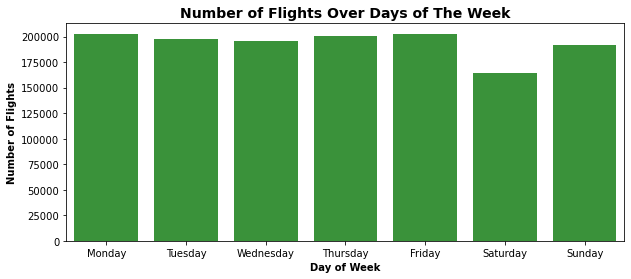

In [4]:
# Bar plot
plt.figure(figsize=[10,4])
base_color = sns.color_palette()[2]
sns.countplot(data = clean_flights, x = 'day_of_week', color = base_color)

plt.title('Number of Flights Over Days of The Week', fontsize=14, weight = 'bold')
plt.xlabel('Day of Week', fontsize=10, weight = 'bold')
plt.ylabel('Number of Flights', fontsize=10, weight = 'bold');

## Percentage of Flights For The Quarters 

 The first and the Fourth quarters of the year have the lowest ratio of flights

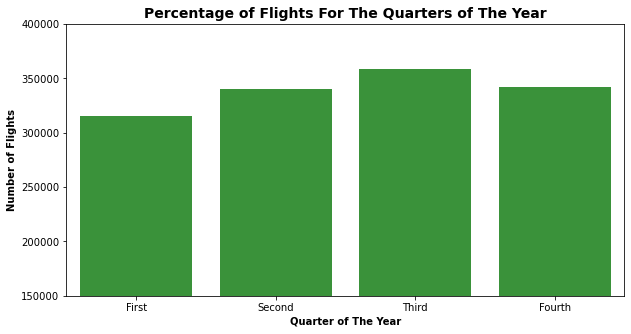

In [5]:
# Bar plot
plt.figure(figsize=[10,5])
base_color = sns.color_palette()[2]
plot = sns.countplot(data = clean_flights, x = 'quarter', color = base_color)
plt.title('Percentage of Flights For The Quarters of The Year', fontsize=14, weight = 'bold')
plt.xlabel('Quarter of The Year', fontsize=10, weight = 'bold')
plt.ylabel('Number of Flights', fontsize=10, weight = 'bold');
plot.set(ylim=(150000, 400000));


## Distribution of Day of Month

The last three days of the month have less air traffic all year round, while the remaining days are fairly constant.

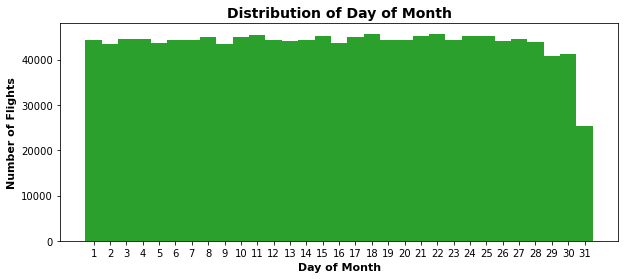

In [6]:
# Histogram plot
plt.figure(figsize=[10,4])
bin_edges = np.arange(0.5, 32, 1)
plt.hist(data = clean_flights, x = 'day_of_month', bins = bin_edges , color = base_color)
plt.xticks(np.arange(1, 32, 1))

plt.title('Distribution of Day of Month', fontsize = 14, weight = 'bold')
plt.xlabel('Day of Month', fontsize = 11, weight = 'bold')
plt.ylabel('Number of Flights', fontsize = 11, weight = 'bold');

## Destination Cities of California Flights VS. Days of the Week

The largest number of flights arriving in California from outside during the week is for the city of Los Angeles, which ranks third behind the city of San Francisco and San Diago, and it seems that the city of Santa Mary and Mammoth Lakes has the fewest flights arriving there during the week.

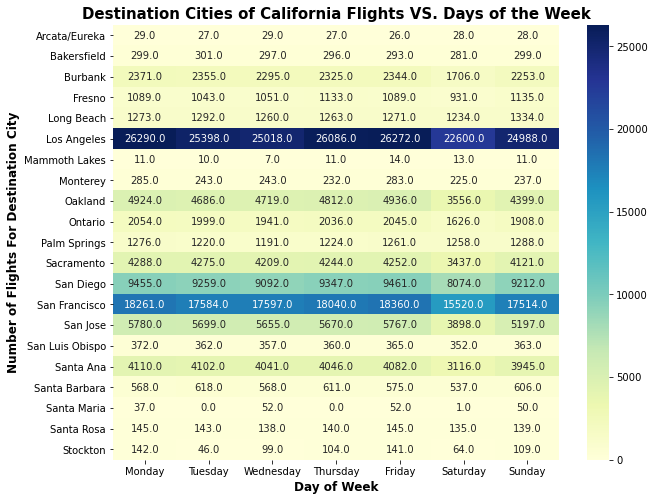

In [7]:
# Heat map
plt.figure(figsize=[10,8])
# taking the California destination of the flights 
toca_clean_flights = clean_flights[(clean_flights.dest_state_name == 'CA') & 
                                  (clean_flights.origin_state_name != 'CA')]
ct_counts = toca_clean_flights.groupby(['day_of_week', 'dest_city_name']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'dest_city_name', columns = 'day_of_week', values = 'count')

sns.heatmap(ct_counts, annot = True, fmt = '0.1f',  cmap="YlGnBu");


plt.title('Destination Cities of California Flights VS. Days of the Week', fontsize=15, weight = 'bold')
plt.xlabel('Day of Week', fontsize=12, weight = 'bold')
plt.ylabel('Number of Flights For Destination City', fontsize=12, weight = 'bold');

## Quarters of The Year VS. The Day of Week

In the first and second quarters, Friday is the day most passengers fly, but in the third quarter it seems that Monday is the day with the most traffic with a noticeable difference, and the same goes for Tuesday in the last quarter of the year . In addition, we note that Saturday is the smallest day of the week in terms of the number of flights in all quarters of the year, as we can confirm in the second graph.

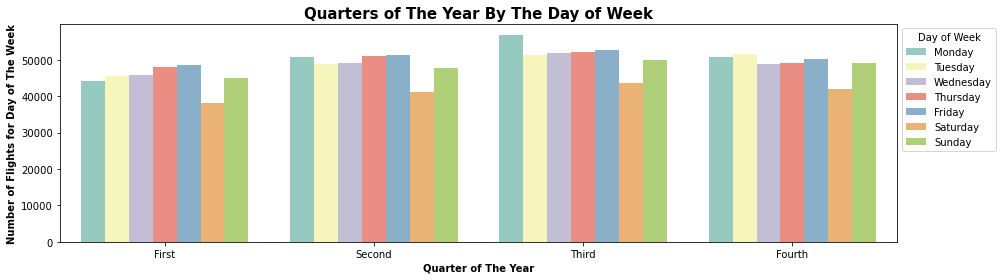

In [8]:
# Clustered Bar Chart
plt.figure(figsize=[15,4])
plot = sns.countplot(data = clean_flights, x = 'quarter', hue = 'day_of_week' , palette="Set3" )
plot.legend(loc='center left', bbox_to_anchor=(1, 0.7), title = 'Day of Week');

plt.title('Quarters of The Year By The Day of Week', fontsize=15, weight = 'bold')
plt.xlabel('Quarter of The Year', fontsize=10, weight = 'bold')
plt.ylabel('Number of Flights for Day of The Week', fontsize=10, weight = 'bold');

## Local Flights VS. The Quarters and Arrival Delay

For the first quarter, the city of Mammoth Lakes appears to have the highest average arrival delay for the destination city for local flights. The same was true for Bakersfield for the second and third quarters. And it seems that the city of San Luis Obispo has the highest average late arrival in the fourth quarter.

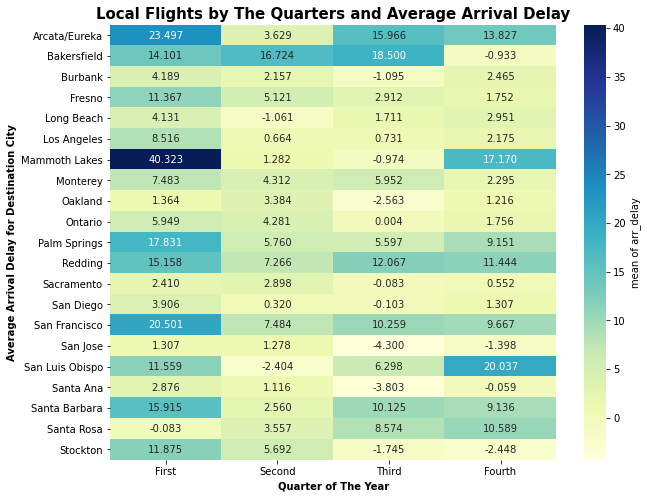

In [9]:
# Adapted heat map
plt.figure(figsize=[10,8])
#local flights
local_clean_flights = clean_flights[(clean_flights.origin_state_name == 'CA') & (clean_flights.dest_state_name == 'CA')]
Local_means = local_clean_flights.groupby(['quarter', 'dest_city_name']).mean()['arr_delay']
Local_means = Local_means.reset_index(name = 'arr_delay_avg')
Local_means = Local_means.pivot(index = 'dest_city_name', columns = 'quarter', values = 'arr_delay_avg')
sns.heatmap(Local_means, annot = True, fmt = '.3f',cmap = 'YlGnBu', cbar_kws = {'label' : 'mean of arr_delay'});

plt.title('Local Flights by The Quarters and Average Arrival Delay', fontsize=15, weight = 'bold')
plt.xlabel('Quarter of The Year', fontsize=10, weight = 'bold')
plt.ylabel('Average Arrival Delay for Destination City', fontsize=10, weight = 'bold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [17]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 882693 bytes to slide_deck_template.slides.html
